In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


In [4]:
test_df = pd.read_csv('test.csv')

In [5]:
test_df.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-02-06 10:03:24,130231,2021-02-06 00:00:00,2021-02-06 10:03:49,2021-02-06 10:04:15,12884,1.6585,4.54,216.0,215.0,1.0,747.0,NaN,NaN,NaN,273.400000
1,2021-02-06 10:03:26,130232,2021-02-06 00:00:00,2021-02-06 10:03:27,2021-02-06 10:03:36,3541,2.0709,5.84,52.0,52.0,0.0,75.0,NaN,NaN,NaN,252.100000
2,2021-02-06 10:03:27,130233,2021-02-06 00:00:00,2021-02-06 10:04:14,2021-02-06 10:05:34,603,1.3884,0.99,289.0,289.0,0.0,2214.0,NaN,NaN,NaN,241.383333
3,2021-02-06 10:03:29,130234,2021-02-06 00:00:00,2021-02-06 10:03:30,2021-02-06 10:03:53,3414,1.9039,2.59,125.0,122.0,3.0,1020.0,NaN,NaN,NaN,291.933333
4,2021-02-06 10:03:35,130235,2021-02-06 00:00:00,2021-02-06 10:03:43,2021-02-06 10:04:43,1426,0.8275,0.94,352.0,350.0,2.0,7284.0,NaN,NaN,NaN,247.133333


In [6]:
df = df.drop(['pickup_time', 'delivered_time', 'cancelled_time'], axis = 1)

In [7]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000


In [8]:
df['reassignment_method'].isna().sum()

436256

In [9]:
df['reassignment_reason'].isna().sum()

436247

In [10]:
df['reassigned_order'].isna().sum()

436247

In [11]:
df['cancelled'].value_counts()

0    444782
1      5218
Name: cancelled, dtype: int64

In [12]:
df['reassignment_method'].value_counts()

auto      13383
manual      361
Name: reassignment_method, dtype: int64

In [13]:
df = df.drop(['reassignment_method'], axis = 1)

In [14]:
test_df = test_df.drop(['reassignment_method'], axis = 1)

In [15]:
df['reassigned_order'].value_counts()

1.0    13753
Name: reassigned_order, dtype: int64

In [16]:
df['reassigned_order'] = df['reassigned_order'].fillna(0)

In [17]:
df['reassignment_reason'].value_counts()

Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket    7212
Reassignment Request from SE portal.                                            5300
Reassign                                                                        1241
Name: reassignment_reason, dtype: int64

In [18]:
test_df['reassigned_order'] = test_df['reassigned_order'].fillna(0)

In [19]:
test_df['reassigned_order'].value_counts()

0.0    140209
1.0      4635
Name: reassigned_order, dtype: int64

In [20]:
test_df['reassigned_order'].isna().sum()

0

In [21]:
df['reassignment_reason'] = df['reassignment_reason'].fillna(0)

In [22]:
test_df['reassignment_reason'] = test_df['reassignment_reason'].fillna(0)

In [23]:
df.dtypes

order_time               object
order_id                  int64
order_date               object
allot_time               object
accept_time              object
rider_id                  int64
first_mile_distance     float64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
cancelled                 int64
undelivered_orders      float64
lifetime_order_count    float64
reassignment_reason      object
reassigned_order        float64
session_time            float64
dtype: object

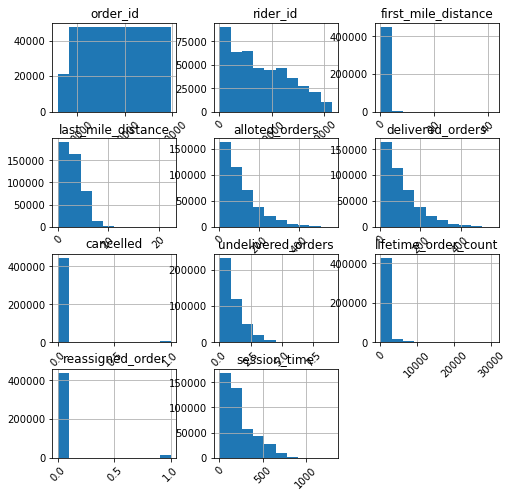

In [24]:
df.hist(figsize=(8,8), xrot=45)
plt.show()

In [25]:
df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,450000.000000,446325.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,0.030562,220.474779
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.172129,176.713853
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,0.000000,84.100000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,0.000000,175.550000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,0.000000,316.766667
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.000000,1298.966667


In [26]:
df.describe(include='object')

,order_time,order_date,allot_time,accept_time,reassignment_reason
count,450000,450000,450000,449843,450000
unique,252868,12,246871,254201,4
top,2021-01-30 14:38:36,2021-02-05 00:00:00,2021-01-29 14:18:11,2021-01-27 16:03:12,0
freq,11,42341,13,15,436247


In [27]:
#adding time columns
df['order_time'] = pd.to_datetime(df['order_time'])
df['allot_time'] = pd.to_datetime(df['allot_time'])
df['accept_time'] = pd.to_datetime(df['accept_time'])
t1 = df['allot_time'] - df['order_time']
t2 = df['accept_time'] - df['allot_time']
df['allot_duration'] = t1
df['accept_duration'] = t2
df['accept_duration'] = pd.to_timedelta(df['accept_duration']).dt.total_seconds()
df['allot_duration'] = pd.to_timedelta(df['allot_duration']).dt.total_seconds()

In [28]:
df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassigned_order,session_time,allot_duration,accept_duration
count,450000.000000,450000.000000,450000.000000,450000.000000,433052.000000,432659.000000,450000.000000,432659.000000,449947.000000,450000.000000,446325.000000,450000.000000,449843.000000
mean,369143.080767,7763.244016,1.229889,2.968873,104.620909,103.950448,0.011596,0.764165,853.640664,0.030562,220.474779,73.199969,61.005662
std,131146.906408,5592.880135,0.846183,1.884124,90.135492,89.639646,0.107057,1.066473,1502.976162,0.172129,176.713853,275.048691,107.454660
min,118350.000000,0.000000,0.000134,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28534.000000
25%,257342.750000,2805.000000,0.539575,1.470000,36.000000,36.000000,0.000000,0.000000,165.000000,0.000000,84.100000,1.000000,15.000000
50%,369842.500000,6754.000000,1.138700,2.670000,81.000000,81.000000,0.000000,0.000000,396.000000,0.000000,175.550000,15.000000,37.000000
75%,482342.250000,11965.000000,1.853000,4.220000,147.000000,146.000000,0.000000,1.000000,948.000000,0.000000,316.766667,48.000000,63.000000
max,594842.000000,21566.000000,42.038100,22.410000,567.000000,562.000000,1.000000,9.000000,30469.000000,1.000000,1298.966667,32334.000000,930.000000


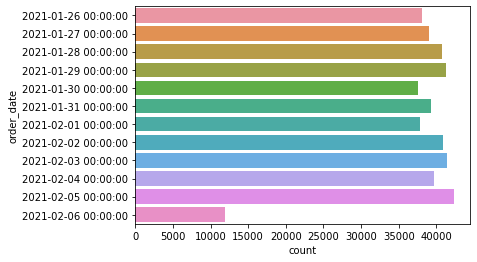

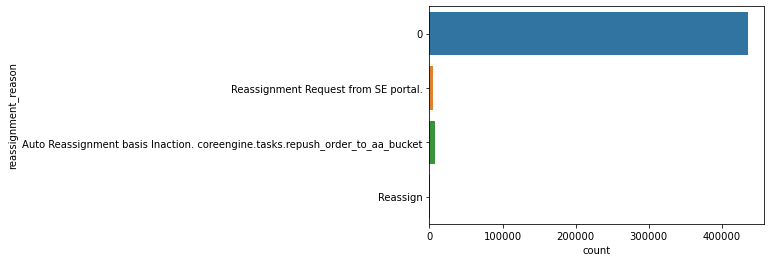

In [29]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

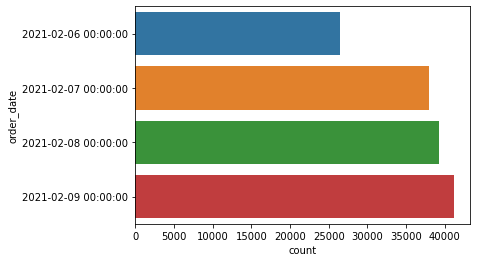

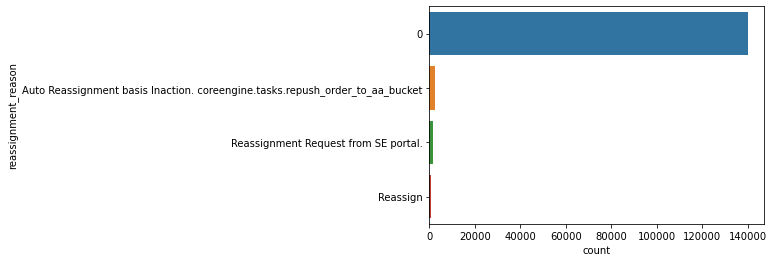

In [30]:
for col in test_df.select_dtypes(include='object'):
    if test_df[col].nunique() <= 22:
        sns.countplot(y=col, data=test_df)
        plt.show()

In [31]:
df = df.drop(['order_date'], axis = 1)
test_df = test_df.drop(['order_date'], axis = 1)

In [32]:
test_df['order_time'] = pd.to_datetime(test_df['order_time'])
test_df['allot_time'] = pd.to_datetime(test_df['allot_time'])
test_df['accept_time'] = pd.to_datetime(test_df['accept_time'])
t1 = test_df['allot_time'] - test_df['order_time']
t2 = test_df['accept_time'] - test_df['allot_time']
test_df['allot_duration'] = t1
test_df['accept_duration'] = t2
test_df['accept_duration'] = pd.to_timedelta(test_df['accept_duration']).dt.total_seconds()
test_df['allot_duration'] = pd.to_timedelta(test_df['allot_duration']).dt.total_seconds()

In [33]:
test_df.describe()

,order_id,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassigned_order,session_time,allot_duration,accept_duration
count,144844.000000,144844.000000,144844.000000,144844.000000,140071.000000,139960.000000,139960.000000,144066.000000,144844.000,139790.000000,144844.000000,144776.000000
mean,74594.701610,5050.498019,1.317988,2.846224,105.236402,104.522542,0.796120,827.877716,0.032,236.664557,75.502976,61.499889
std,45018.049343,3587.392934,0.852682,1.832061,89.838188,89.347307,1.091238,1511.791891,0.176,187.018749,335.821612,99.865747
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,-4213.000000
25%,36210.750000,1915.000000,0.649600,1.360000,37.000000,36.000000,0.000000,132.000000,0.000,88.800000,1.000000,13.000000
50%,72421.500000,4513.000000,1.245100,2.540000,83.000000,82.000000,0.000000,356.000000,0.000,190.258333,2.000000,37.000000
75%,108632.250000,7634.000000,1.949900,4.120000,148.000000,147.000000,1.000000,913.000000,0.000,354.008333,27.000000,67.000000
max,156724.000000,13984.000000,54.690200,20.680000,558.000000,553.000000,10.000000,30469.000000,1.000,1210.316667,12215.000000,967.000000


In [34]:
df = df.drop(['accept_duration'], axis = 1)
test_df = test_df.drop(['accept_duration'], axis = 1)

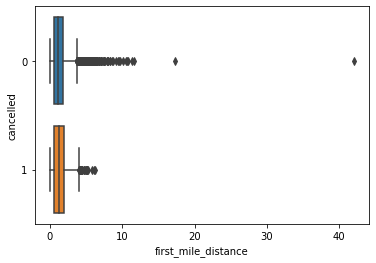

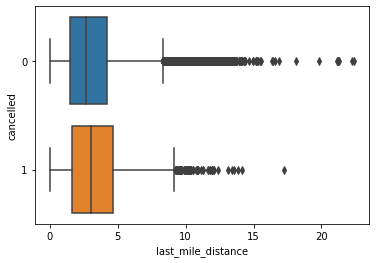

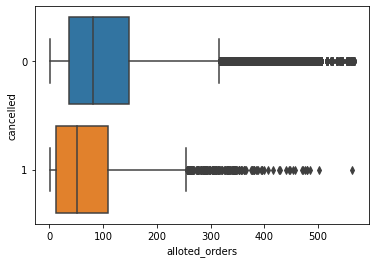

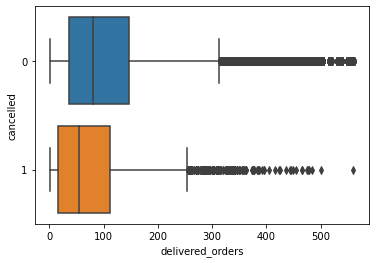

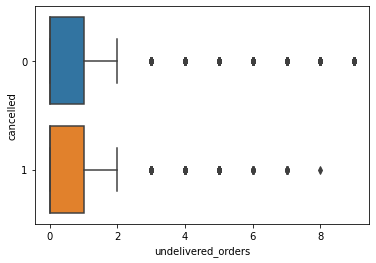

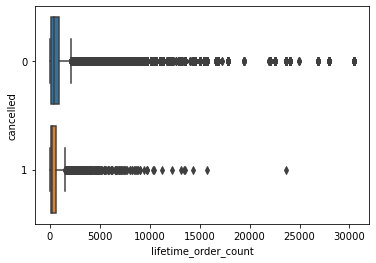

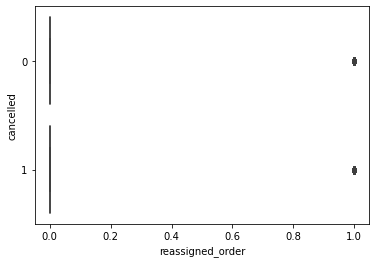

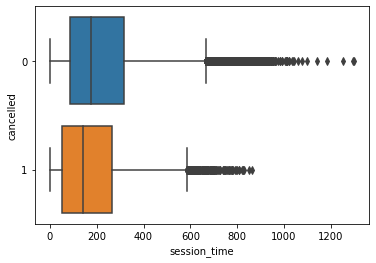

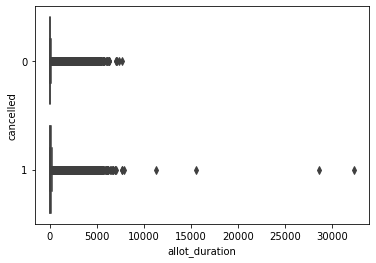

In [35]:
num_cols = ['first_mile_distance','last_mile_distance', 'alloted_orders', 'delivered_orders','undelivered_orders','lifetime_order_count','reassigned_order','session_time','allot_duration']
for col in num_cols:
    sns.boxplot(y = df['cancelled'].astype('category'), x = col, data=df)
    plt.show()

In [36]:
df = df.drop(['first_mile_distance', 'undelivered_orders','reassigned_order'], axis = 1)
test_df = test_df.drop(['first_mile_distance','undelivered_orders','reassigned_order'], axis = 1)

In [37]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <=4:
        display(pd.crosstab(df['cancelled'], df[col], normalize='index'))        

reassignment_reason,0,Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket,Reassign,Reassignment Request from SE portal.
cancelled,,,,
0,0.970703,0.015799,0.002176,0.011322
1,0.861633,0.035454,0.052319,0.050594


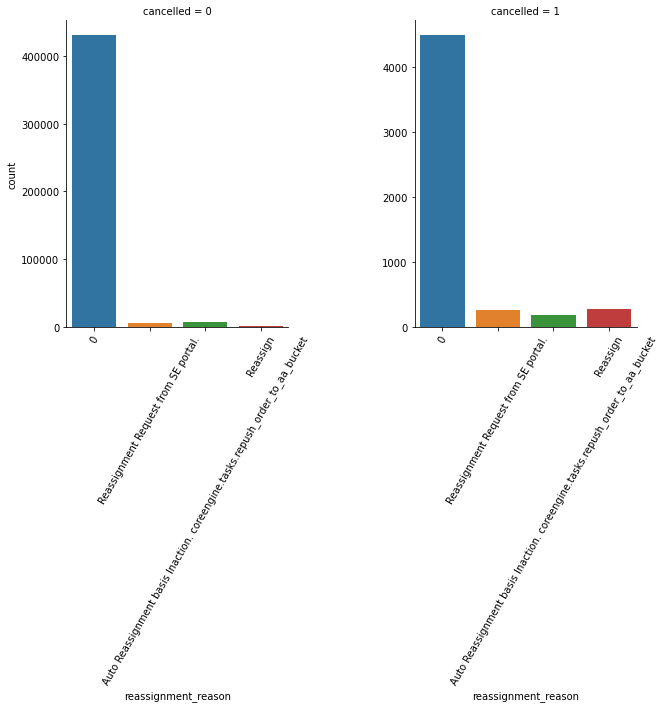

In [38]:

for col in df.select_dtypes(include='object'):
    if df[col].nunique() > 0:
        g = sns.catplot(x = col, kind='count', col = 'cancelled', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

In [39]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 4:
        display(df.groupby(col)[['cancelled','last_mile_distance', 'alloted_orders', 'delivered_orders','lifetime_order_count','session_time']].mean())

,cancelled,last_mile_distance,alloted_orders,delivered_orders,lifetime_order_count,session_time
reassignment_reason,,,,,,
0,0.010306,2.970217,104.888625,104.217617,850.217405,220.203865
Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket,0.025652,2.740354,101.457253,100.799943,901.257075,224.481793
Reassign,0.219984,2.933030,96.185464,95.432749,903.715552,221.293856
Reassignment Request from SE portal.,0.049811,3.177596,88.900412,88.274529,1058.936026,238.140808


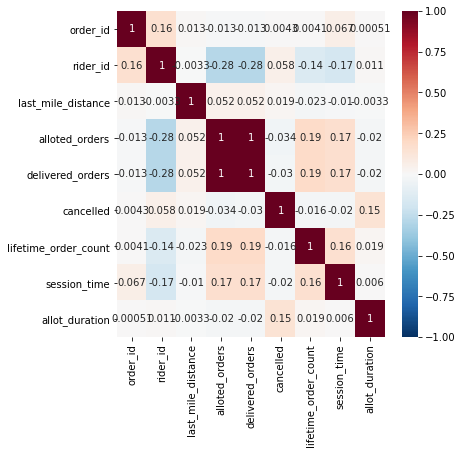

In [40]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

In [41]:
df.head()

,order_time,order_id,allot_time,accept_time,rider_id,last_mile_distance,alloted_orders,delivered_orders,cancelled,lifetime_order_count,reassignment_reason,session_time,allot_duration
0,2021-01-26 02:21:35,556753,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,2.65,46.0,46.0,0,621.0,0,NaN,24.0
1,2021-01-26 02:33:16,556754,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.76,8.0,8.0,0,105.0,0,3.266667,41.0
2,2021-01-26 02:39:49,556755,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,4.80,1.0,1.0,0,66.0,0,9.816667,8.0
3,2021-01-26 02:47:53,556756,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,6.38,1.0,1.0,0,127.0,0,17.533333,32.0
4,2021-01-26 03:06:30,556757,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,4.01,34.0,34.0,0,84.0,0,1.350000,51.0


In [42]:
df = df.drop(['accept_time'], axis = 1)
test_df = test_df.drop(['accept_time'], axis = 1)

In [43]:
df['order_time'] = pd.Series([val.time() for val in df['order_time']])

In [44]:
df.head()

,order_time,order_id,allot_time,rider_id,last_mile_distance,alloted_orders,delivered_orders,cancelled,lifetime_order_count,reassignment_reason,session_time,allot_duration
0,02:21:35,556753,2021-01-26 02:21:59,11696,2.65,46.0,46.0,0,621.0,0,NaN,24.0
1,02:33:16,556754,2021-01-26 02:33:57,18117,2.76,8.0,8.0,0,105.0,0,3.266667,41.0
2,02:39:49,556755,2021-01-26 02:39:57,18623,4.80,1.0,1.0,0,66.0,0,9.816667,8.0
3,02:47:53,556756,2021-01-26 02:48:25,15945,6.38,1.0,1.0,0,127.0,0,17.533333,32.0
4,03:06:30,556757,2021-01-26 03:07:21,17589,4.01,34.0,34.0,0,84.0,0,1.350000,51.0


In [45]:
df['allot_time'] = pd.Series([val.time() for val in df['allot_time']])
test_df['order_time'] = pd.Series([val.time() for val in test_df['order_time']])
test_df['allot_time'] = pd.Series([val.time() for val in test_df['allot_time']])

In [46]:
df.head()

,order_time,order_id,allot_time,rider_id,last_mile_distance,alloted_orders,delivered_orders,cancelled,lifetime_order_count,reassignment_reason,session_time,allot_duration
0,02:21:35,556753,02:21:59,11696,2.65,46.0,46.0,0,621.0,0,NaN,24.0
1,02:33:16,556754,02:33:57,18117,2.76,8.0,8.0,0,105.0,0,3.266667,41.0
2,02:39:49,556755,02:39:57,18623,4.80,1.0,1.0,0,66.0,0,9.816667,8.0
3,02:47:53,556756,02:48:25,15945,6.38,1.0,1.0,0,127.0,0,17.533333,32.0
4,03:06:30,556757,03:07:21,17589,4.01,34.0,34.0,0,84.0,0,1.350000,51.0


In [47]:
test_df.head()

,order_time,order_id,allot_time,rider_id,last_mile_distance,alloted_orders,delivered_orders,lifetime_order_count,reassignment_reason,session_time,allot_duration
0,10:03:24,130231,10:03:49,12884,4.54,216.0,215.0,747.0,0,273.400000,25.0
1,10:03:26,130232,10:03:27,3541,5.84,52.0,52.0,75.0,0,252.100000,1.0
2,10:03:27,130233,10:04:14,603,0.99,289.0,289.0,2214.0,0,241.383333,47.0
3,10:03:29,130234,10:03:30,3414,2.59,125.0,122.0,1020.0,0,291.933333,1.0
4,10:03:35,130235,10:03:43,1426,0.94,352.0,350.0,7284.0,0,247.133333,8.0


In [48]:
df['order_time'].value_counts()

13:32:46    50
13:32:50    48
13:32:13    48
13:34:54    44
13:32:03    43
            ..
11:32:38     1
10:14:38     1
06:10:43     1
12:10:01     1
10:37:56     1
Name: order_time, Length: 43383, dtype: int64

In [49]:
test_df['order_time'].value_counts()

15:07:04    21
14:02:45    21
13:34:57    20
14:16:39    20
13:33:10    19
            ..
07:33:35     1
09:58:26     1
10:59:04     1
11:00:55     1
11:32:05     1
Name: order_time, Length: 35743, dtype: int64

In [50]:
df['order_time'] = pd.Series(val.strftime('%H') for val in df['order_time'])

In [51]:
test_df['order_time'] = pd.Series(val.strftime('%H') for val in test_df['order_time'])

In [52]:
df['allot_time'] = pd.Series(val.strftime('%H') for val in df['allot_time'])

In [53]:
test_df['allot_time'] = pd.Series(val.strftime('%H') for val in test_df['allot_time'])

In [54]:
df.head()

,order_time,order_id,allot_time,rider_id,last_mile_distance,alloted_orders,delivered_orders,cancelled,lifetime_order_count,reassignment_reason,session_time,allot_duration
0,02,556753,02,11696,2.65,46.0,46.0,0,621.0,0,NaN,24.0
1,02,556754,02,18117,2.76,8.0,8.0,0,105.0,0,3.266667,41.0
2,02,556755,02,18623,4.80,1.0,1.0,0,66.0,0,9.816667,8.0
3,02,556756,02,15945,6.38,1.0,1.0,0,127.0,0,17.533333,32.0
4,03,556757,03,17589,4.01,34.0,34.0,0,84.0,0,1.350000,51.0


In [55]:
test_df.head()

,order_time,order_id,allot_time,rider_id,last_mile_distance,alloted_orders,delivered_orders,lifetime_order_count,reassignment_reason,session_time,allot_duration
0,10,130231,10,12884,4.54,216.0,215.0,747.0,0,273.400000,25.0
1,10,130232,10,3541,5.84,52.0,52.0,75.0,0,252.100000,1.0
2,10,130233,10,603,0.99,289.0,289.0,2214.0,0,241.383333,47.0
3,10,130234,10,3414,2.59,125.0,122.0,1020.0,0,291.933333,1.0
4,10,130235,10,1426,0.94,352.0,350.0,7284.0,0,247.133333,8.0


In [56]:
df['order_time'] = df['order_time'].astype(int)

In [57]:
test_df['order_time'] = test_df['order_time'].astype(int)

In [58]:
df['allot_time'] = df['allot_time'].astype(int)

In [59]:
test_df['allot_time'] = test_df['allot_time'].astype(int)

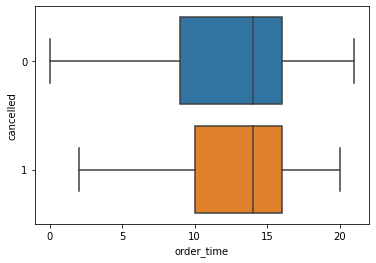

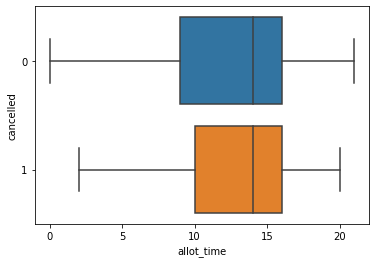

In [60]:
num_cols = ['order_time','allot_time']
for col in num_cols:
    sns.boxplot(y = df['cancelled'].astype('category'), x = col, data=df)
    plt.show()

In [61]:
df.dtypes

order_time                int32
order_id                  int64
allot_time                int32
rider_id                  int64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
cancelled                 int64
lifetime_order_count    float64
reassignment_reason      object
session_time            float64
allot_duration          float64
dtype: object

In [62]:
test_df.dtypes

order_time                int32
order_id                  int64
allot_time                int32
rider_id                  int64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
lifetime_order_count    float64
reassignment_reason      object
session_time            float64
allot_duration          float64
dtype: object

In [63]:
df['reassignment_reason'].value_counts()

0                                                                               436247
Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket      7212
Reassignment Request from SE portal.                                              5300
Reassign                                                                          1241
Name: reassignment_reason, dtype: int64

In [64]:
df['reassignment_num'] = df['reassignment_reason'].replace({'Auto Reassignment basis Inaction. coreengine.tasks.repush_order_to_aa_bucket':'1', 'Reassignment Request from SE portal.': '2', 'Reassign' : '3'}).astype(float)


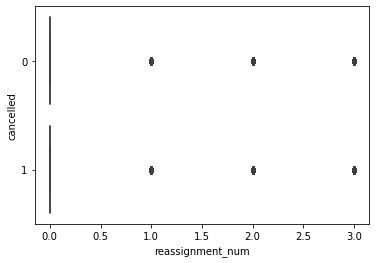

In [65]:
num_cols = ['reassignment_num']
for col in num_cols:
    sns.boxplot(y = df['cancelled'].astype('category'), x = col, data=df)
    plt.show()

In [66]:
df = df.drop(['reassignment_num', 'reassignment_reason'], axis = 1)

In [67]:
test_df = test_df.drop(['reassignment_reason'], axis = 1)

In [68]:
df.dtypes

order_time                int32
order_id                  int64
allot_time                int32
rider_id                  int64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
cancelled                 int64
lifetime_order_count    float64
session_time            float64
allot_duration          float64
dtype: object

In [69]:
test_df.dtypes

order_time                int32
order_id                  int64
allot_time                int32
rider_id                  int64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
lifetime_order_count    float64
session_time            float64
allot_duration          float64
dtype: object

In [70]:
df.drop(['allot_duration', 'lifetime_order_count'], axis = 1, inplace = True)
test_df.drop(['allot_duration','lifetime_order_count'], axis = 1, inplace = True)

In [88]:
from imblearn.over_sampling import SMOTE
# Separate input features and target
df = df.fillna(df.median())
df = df.drop(['order_id'], axis = 1)
X = df.drop(['cancelled'], axis =1)
y = df['cancelled']
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
# setting up testing and training sets
from sklearn.model_selection import train_test_split
sm = SMOTE()
X_train, y_train = sm.fit_resample(X, y)
X_train.shape, y_train.shape

((667148, 7), (667148,))

In [94]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train , y_train)

In [95]:
test_df = test_df.fillna(test_df.median())

In [97]:
order_id = test_df['order_id']
actual_X = test_df.drop(['order_id'], axis = 1)
x_scaled = scaler.fit_transform(actual_X)
actual_X = pd.DataFrame(x_scaled)
pred_new = model.predict(actual_X)

In [98]:
ans_new = pd.DataFrame({'order_id': order_id, 'cancelled': pred_new})
ans_new['cancelled'].value_counts()

1    116001
0     28843
Name: cancelled, dtype: int64

In [100]:
ans_new.to_csv('ans_new1.csv', index = False)